The accuracy results change because the weight initialization, regularization, layers, optimization, and model fitting are stochastic processes involving randomness. So, if different random seeds are used then the results will vary as shown in Table 1. 

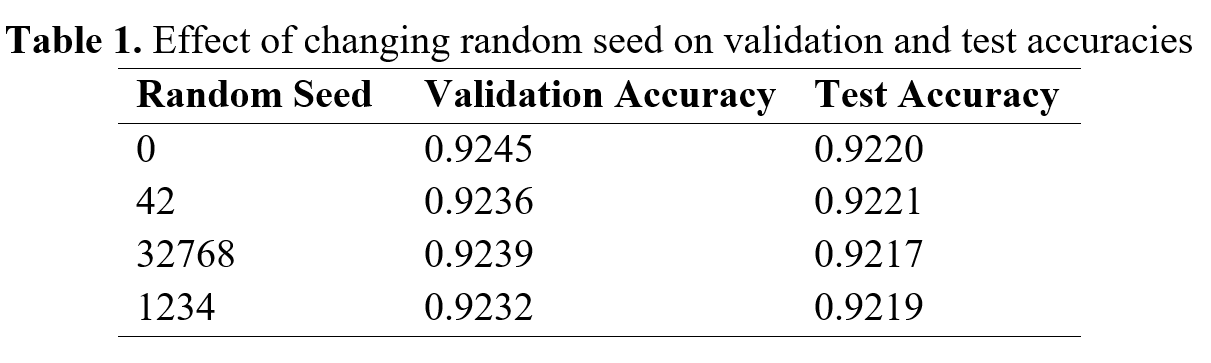

In [ ]:
import tensorflow as tf
import numpy as np
from  tensorflow import keras

In [ ]:
# choosing a random seed for reproducibility
np.random.seed(0) # used for different seeds, 0, 42, 32768, and 1234

In [ ]:
# network and training 
EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 #number of outputs =  Number of digits
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # How much data is reserved for validation

In [ ]:
# loading MNIST dataset
# verify the split between train and test is 60,000 and 10,000 respectively one -hot is automatically applied
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], ' test samples')
      
     
    



11493376/11490434 [==============================] - 0s 0us/step
60000 train samples
10000  test samples


In [ ]:
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
#normalize in [0,1]
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
#one-hot
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

In [ ]:
#build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(NB_CLASSES,
   		input_shape=(RESHAPED,),
   		name='dense_layer', 
   		activation='softmax'))

# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer3 (Dense)         (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compiling the model
model.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#training the model
model.fit(X_train, Y_train,
		batch_size=BATCH_SIZE, epochs=EPOCHS,
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/200
375/375 [==============================] - 1s 2ms/step - loss: 1.3965 - accuracy: 0.6627 - val_loss: 0.9003 - val_accuracy: 0.8267
Epoch 2/200
375/375 [==============================] - 1s 1ms/step - loss: 0.7947 - accuracy: 0.8293 - val_loss: 0.6584 - val_accuracy: 0.8570
Epoch 3/200
375/375 [==============================] - 1s 1ms/step - loss: 0.6431 - accuracy: 0.8506 - val_loss: 0.5622 - val_accuracy: 0.8711
Epoch 4/200
375/375 [==============================] - 1s 2ms/step - loss: 0.5706 - accuracy: 0.8615 - val_loss: 0.5092 - val_accuracy: 0.8790
Epoch 5/200
375/375 [==============================] - 1s 1ms/step - loss: 0.5265 - accuracy: 0.8675 - val_loss: 0.4751 - val_accuracy: 0.8835
Epoch 6/200
375/375 [==============================] - 1s 2ms/step - loss: 0.4963 - accuracy: 0.8727 - val_loss: 0.4508 - val_accuracy: 0.8872
Epoch 7/200
375/375 [==============================] - 1s 1ms/step - loss: 0.4739 - accuracy: 0.8771 - val_loss: 0.4327 - val_accuracy: 0.8896

In [ ]:
#evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

# making prediction
predictions = model.predict(X_test)

313/313 [==============================] - 0s 760us/step - loss: 0.2768 - accuracy: 0.9220
Test accuracy: 0.921999990940094
